# Reproducible file paths

Let's import the packages we'll be working with

In [4]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
fp = os.path.join('data','gbif_sus_scrofa_california','gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [9]:
pigs = gpd.read_file(fp)
pigs.head

<bound method NDFrame.head of           gbifID     species       state  individual   day  month    year  \
0      899953814  Sus scrofa  California         NaN  22.0    3.0  2014.0   
1      899951348  Sus scrofa  California         NaN   9.0    6.0  2007.0   
2      896560733  Sus scrofa  California         NaN  20.0   12.0  1937.0   
3      896559958  Sus scrofa  California         NaN   1.0    4.0  1969.0   
4      896559722  Sus scrofa  California         NaN   1.0    1.0  1961.0   
...          ...         ...         ...         ...   ...    ...     ...   
1041  1024216143  Sus scrofa  California         NaN  24.0    8.0  2014.0   
1042  1024215805  Sus scrofa  California         NaN  24.0    8.0  2014.0   
1043  1024215159  Sus scrofa  California         NaN  23.0    8.0  2014.0   
1044  1019052419  Sus scrofa  California         2.0  18.0    9.0  1998.0   
1045  1019052401  Sus scrofa  California         2.0  18.0    9.0  1998.0   

                                             

### Check-in

Create a file path using `os.path.join()` to import the shapefile of the California state boundary as a `geopandas.GeoDataFrame`. Once imported, take a look at the data.

In [7]:
fp2 = os.path.join('data', 'ca_boundary', 'ca_state_boundary.shp')
fp2

'data/ca_boundary/ca_state_boundary.shp'

In [10]:
ca_boundary = gpd.read_file(fp2)
ca_boundary.head

<bound method NDFrame.head of   REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  MTFCC  \
0      4        9      06  01779778    06     CA  California   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A  403501101370  20466718403  +37.1551773  -119.5434183   

                                            geometry  
0  MULTIPOLYGON (((-119.63473 33.26545, -119.6363...  >

## GeoSeries and GeoDataFrame

The core data structure in GeoPandas is the `geopandas.GeoDataFrame`. We can think of it as a `pandas.DataFrame` with a dedicated geometry column that can perform spatial operations.

In [12]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [14]:
# Check what kind of object is pigs
print(type(pigs))

# check what kind of object is the geometry column
print(type(pigs.geometry))

# check what kind of object is the species column
(print(type(pigs.species)))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the values in each col

In [15]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [17]:
# Check the geometry type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

### Check-in:
What is the geometry tupe of the single feature in the CA state boundary? And why does it make sense to have this kind of geometry?

In [22]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS and extend

CRS = coordinate reference system and is one of the basic info pieces for geospatial data

We can think of the CRS as instructions to locate each spatial feature of our data frame on the surface of the earth.

In [24]:
# access the CR of the GeoDataFRame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

4326 is one of the most common ones you'll encounter. It's what google earth and the DOD use. EPGS = european survey group

In [27]:
# Get more information about the CRS
print('ellipsoid: ', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic? ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellipsoid:  WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic?  True
is projected?  False


- What are the ellipsoid and datum? What are they telling us about the CRS?
- What does it mean that the CRS is geographic and not projected?

The **extent** of the geodf is the bounding box covering *all* the spaital features in our geo-dataframe.
This is formed by finding the points that are furthest 

## Data wrangling

Since `geopandas` is built on top of `pandas`, we may use everythign we have learned about data selection, wrangling, and modification for a `pandas.DataFrame` to wrange `geopandas.GeoDataFrames`.

Example: 

We only want to use recent data for wild pig observations.

In [28]:
# Examiin pig observations by year
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [30]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year >= 2020]

# check the length of the original df
print('Total number of observations ', len(pigs))

# Check length of the new dataframe
print('Number of observations since 2020: ', len(pigs_recent))

Total number of observations  1046
Number of observations since 2020:  606


## Create a map

geo dfs also have a `plot()` method that we can call directtly to plot the data uqickly

<AxesSubplot:>

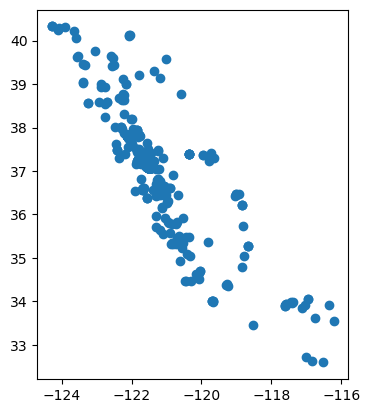

In [32]:
pigs_recent.plot()

### `matplotlib`'s `fig` and `ax`

Matplotlib graphs the data in a **figure** which can have one or more **axes**

The *axes* are only the area specified by a pair of x,y axes and what is plotted in it.

The *figure* may have mulitple axes.

To create a blank figure:

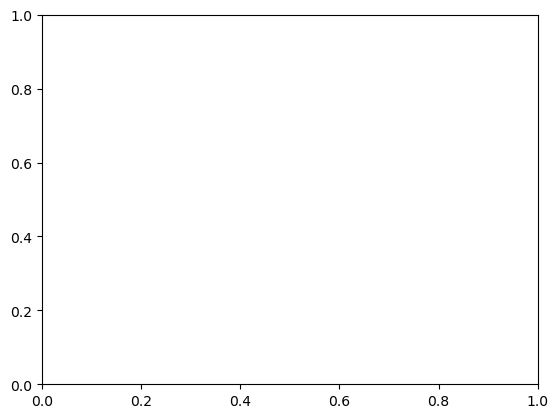

In [34]:
# initialize an empty figure (fig) and axes (ax)
fig, ax = plt.subplots()

# display the figure
plt.show()

### Add layers

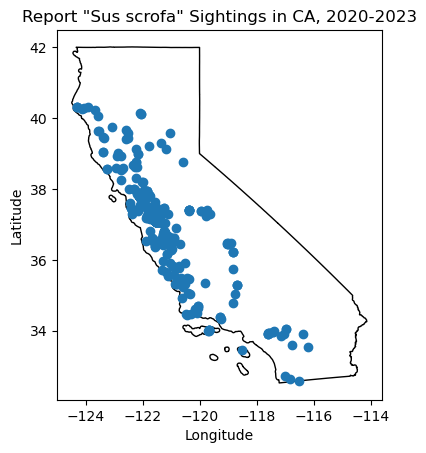

In [38]:
# initialize an empty figure (fig) and axes (ax)
fig, ax = plt.subplots()

# add CA boundary
ca_boundary.plot(ax = ax,
                color = 'none',
                edgecolor = 'black')

# add pigs point plot to our figure's axis
pigs_recent.plot(ax = ax)

# Customization
ax.set_title('Report "Sus scrofa" Sightings in CA, 2020-2023')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display the figure
plt.show()